<a href="https://colab.research.google.com/github/SoheilBadri2000/hoSKlearnKerasTensorflow/blob/main/ch03.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MNIST

In [1]:
from sklearn.datasets import fetch_openml
import matplotlib.pyplot as plt
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.dummy import DummyClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import precision_recall_curve, roc_curve, roc_auc_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.multiclass import OneVsRestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import ConfusionMatrixDisplay, f1_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.multioutput import ClassifierChain
import numpy as np

In [2]:
mnist = fetch_openml("mnist_784", as_frame=False)

/usr/local/lib/python3.10/dist-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


In [3]:
X, y = mnist.data, mnist.target

In [4]:
X

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [5]:
y

array(['5', '0', '4', ..., '4', '5', '6'], dtype=object)

In [6]:
X.shape

(70000, 784)

In [7]:
y.shape

(70000,)

In [8]:
def plot_digit(image_data):
  image = image_data.reshape(28, 28)
  plt.imshow(image, cmap="binary")
  plt.axis("off")

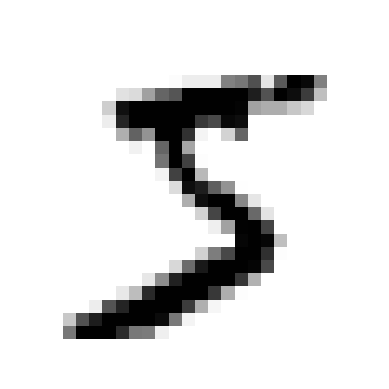

In [9]:
some_digit = X[0]
plot_digit(some_digit)
plt.show()

In [10]:
y[0]

'5'

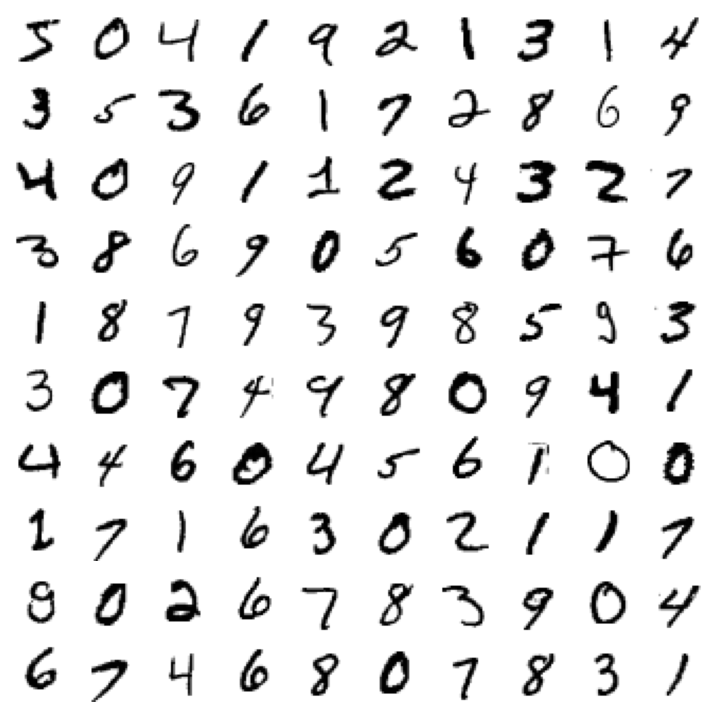

In [11]:
plt.figure(figsize=(9, 9))
for idx, image_data in enumerate(X[:100]):
  plt.subplot(10, 10, idx + 1)
  plot_digit(image_data)

In [12]:
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

In [13]:
y_train_5 = (y_train=='5') # True for all 5s, False for all other digits
y_test_5 = (y_test=='5')

In [14]:
sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(X_train, y_train_5)

SGDClassifier(random_state=42)

In [15]:
sgd_clf.predict([some_digit])

array([ True])

# Measuring Accuracy Using Cross-Validation

In [16]:
cross_val_score(sgd_clf, X_train, y_train_5, cv=3, scoring="accuracy")

array([0.95035, 0.96035, 0.9604 ])

In [17]:
dummy_clf = DummyClassifier()
dummy_clf.fit(X_train, y_train_5)
print(any(dummy_clf.predict(X_train)))

False


In [18]:
y_train_pred = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3)
y_train_pred

array([ True, False, False, ...,  True, False, False])

In [19]:
cm = confusion_matrix(y_train_5, y_train_pred)
cm

array([[53892,   687],
       [ 1891,  3530]])

In [20]:
y_train_perfect_predictions = y_train_5
confusion_matrix(y_train_5, y_train_perfect_predictions)

array([[54579,     0],
       [    0,  5421]])

In [21]:
precision_score(y_train_5, y_train_pred) # == 3530 / (687 + 3530)
# --> When it claims a image represents 5, is correct only 83% 0f time

0.8370879772350012

In [22]:
recall_score(y_train_5, y_train_pred) # == 3530 / (1890 + 3530)
# --> it only detects 65.1% of thr 5s

0.6511713705958311

In [23]:
f1_score(y_train_5, y_train_pred)

0.7325171197343846

In [24]:
y_scores = sgd_clf.decision_function([some_digit])
y_scores

array([2164.22030239])

In [25]:
threshold = 0
y_some_digit_pred = (y_scores > threshold)
y_some_digit_pred

array([ True])

In [26]:
threshold = 3000
y_some_digit_pred = (y_scores > threshold)
y_some_digit_pred

array([False])

In [27]:
y_scores = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3, method="decision_function")
y_scores

array([  1200.93051237, -26883.79202424, -33072.03475406, ...,
        13272.12718981,  -7258.47203373, -16877.50840447])

In [28]:
precisions, recalls, thresholds = precision_recall_curve(y_train_5, y_scores)

In [29]:
precisions

array([0.09035   , 0.09035151, 0.09035301, ..., 1.        , 1.        ,
       1.        ])

In [30]:
recalls

array([1.00000000e+00, 1.00000000e+00, 1.00000000e+00, ...,
       3.68935621e-04, 1.84467810e-04, 0.00000000e+00])

In [31]:
thresholds

array([-146348.56726174, -142300.00705404, -137588.97581744, ...,
         38871.26391927,   42216.05562787,   49441.43765905])

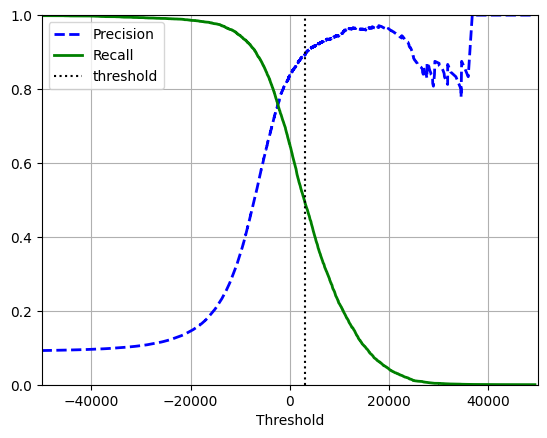

In [32]:
plt.plot(thresholds, precisions[:-1], "b--", label="Precision", linewidth=2)
plt.plot(thresholds, recalls[:-1], "g-", label="Recall", linewidth=2)
plt.vlines(threshold, 0, 1.0, "k", "dotted", label="threshold")

# Extra code
plt.grid()
plt.legend()
plt.axis([-50000, 50000, 0, 1])
plt.xlabel("Threshold")

plt.show()

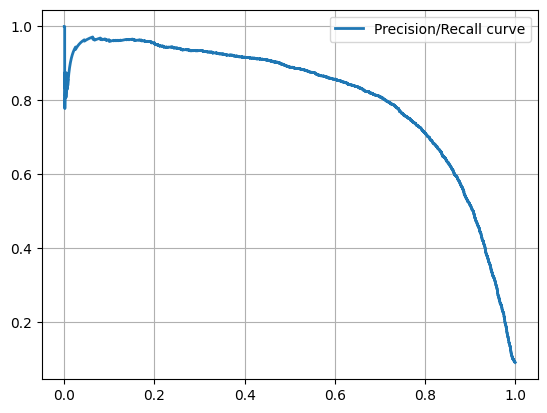

In [33]:
plt.plot(recalls, precisions, linewidth=2, label="Precision/Recall curve")
plt.grid()
plt.legend()
plt.show()

In [34]:
idx_for_90_precision = (precisions >= 0.90).argmax()
threshold_for_90_precision = thresholds[idx_for_90_precision]
threshold_for_90_precision

3370.0194991439557

In [35]:
y_train_pred_90 = (y_scores >= threshold_for_90_precision)

In [36]:
precision_score(y_train_5, y_train_pred_90)

0.9000345901072293

In [37]:
recall_at_90_precision = recall_score(y_train_5, y_train_pred_90)
recall_at_90_precision

0.4799852425751706

In [38]:
fpr, tpr, thresholds = roc_curve(y_train_5, y_scores)

In [39]:
fpr

array([0.        , 0.        , 0.        , ..., 0.99937705, 0.99937705,
       1.        ])

In [40]:
tpr

array([0.00000000e+00, 1.84467810e-04, 9.22339052e-04, ...,
       9.99815532e-01, 1.00000000e+00, 1.00000000e+00])

In [41]:
thresholds

array([  49442.43765905,   49441.43765905,   36801.60697028, ...,
       -105763.22240074, -106527.45300471, -146348.56726174])

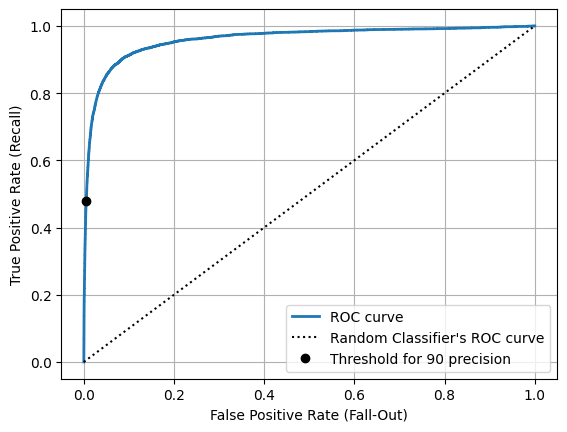

In [42]:
idx_for_threshold_at_90 = (thresholds <= threshold_for_90_precision).argmax()
tpr_90, fpr_90 = tpr[idx_for_threshold_at_90], fpr[idx_for_threshold_at_90]

plt.plot(fpr, tpr, linewidth=2, label="ROC curve")
plt.plot([0,1], [0,1], 'k:', label="Random Classifier's ROC curve")
plt.plot([fpr_90], [tpr_90], "ko", label="Threshold for 90 precision")
plt.legend()
plt.grid()
plt.xlabel("False Positive Rate (Fall-Out)")
plt.ylabel("True Positive Rate (Recall)")
plt.show()

In [43]:
roc_auc_score(y_train_5, y_scores)

0.9604938554008616

In [44]:
forest_clf = RandomForestClassifier(random_state=42)

In [45]:
y_probas_forest = cross_val_predict(forest_clf, X_train, y_train_5, cv=3, method="predict_proba")

In [46]:
y_probas_forest[:2]
# It predicts that first image is positive with 89% probability
# and that the second image is negative with 99% probability

array([[0.11, 0.89],
       [0.99, 0.01]])

In [47]:
# Not in the code
idx_50_to_60 = (y_probas_forest[:, 1] > 0.50) & (y_probas_forest[:, 1] < 0.60)
print(f"{(y_train_5[idx_50_to_60]).sum() / idx_50_to_60.sum():.1%}")

94.0%


In [48]:
y_scores_forest = y_probas_forest[:, 1]
precisions_forest, recalls_forest, thresholds_forest = precision_recall_curve(y_train_5, y_scores_forest)

In [49]:
precisions_forest

array([0.09035   , 0.15601796, 0.21697018, 0.2782198 , 0.3359375 ,
       0.39168474, 0.4434341 , 0.49221099, 0.53883011, 0.58103448,
       0.62384152, 0.65814579, 0.69354839, 0.72090213, 0.74856904,
       0.77310803, 0.79370733, 0.81468478, 0.83029737, 0.84566529,
       0.8605178 , 0.87232994, 0.88209825, 0.89121268, 0.90208833,
       0.90986159, 0.9178634 , 0.92464178, 0.93120086, 0.93672255,
       0.94127273, 0.94605505, 0.95223107, 0.95618941, 0.95927941,
       0.96257089, 0.96431961, 0.96689629, 0.96939365, 0.97113522,
       0.97292032, 0.975495  , 0.97634069, 0.9787572 , 0.98101519,
       0.98323571, 0.98412375, 0.98566455, 0.98719273, 0.98773389,
       0.98974681, 0.99050833, 0.99129327, 0.99186644, 0.99180858,
       0.99259582, 0.99340804, 0.99378606, 0.99440841, 0.99458239,
       0.99474526, 0.99514451, 0.99555659, 0.99622997, 0.99618594,
       0.99638031, 0.9965661 , 0.99652605, 0.99672462, 0.99692938,
       0.99688393, 0.99762031, 0.9981203 , 0.99809004, 0.99832

In [50]:
recalls_forest

array([1.        , 1.        , 1.        , 0.99981553, 0.9994466 ,
       0.99926213, 0.99852426, 0.99667958, 0.99575724, 0.99465043,
       0.99335916, 0.99262129, 0.99151448, 0.99059214, 0.9891164 ,
       0.98745619, 0.98653385, 0.9845047 , 0.98376683, 0.98247556,
       0.98099982, 0.97933961, 0.97712599, 0.97472791, 0.97214536,
       0.97011621, 0.96679579, 0.96421324, 0.96126176, 0.95849474,
       0.95498985, 0.95111603, 0.94871795, 0.9461354 , 0.94299945,
       0.93931009, 0.93728094, 0.93211585, 0.92897989, 0.92473713,
       0.92123224, 0.91791182, 0.9134846 , 0.90942631, 0.90555248,
       0.8979893 , 0.89190186, 0.88784357, 0.88157167, 0.87640657,
       0.87253274, 0.86626084, 0.86109574, 0.85482383, 0.8487364 ,
       0.84080428, 0.83397897, 0.82604685, 0.82014388, 0.81276517,
       0.80317285, 0.79394946, 0.78527947, 0.7799299 , 0.77089098,
       0.76166759, 0.74949271, 0.74082273, 0.72975466, 0.71868659,
       0.70817192, 0.69599705, 0.68566685, 0.67478325, 0.65965

In [51]:
thresholds_forest

array([0.  , 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 ,
       0.11, 0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21,
       0.22, 0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32,
       0.33, 0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43,
       0.44, 0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51, 0.52, 0.53, 0.54,
       0.55, 0.56, 0.57, 0.58, 0.59, 0.6 , 0.61, 0.62, 0.63, 0.64, 0.65,
       0.66, 0.67, 0.68, 0.69, 0.7 , 0.71, 0.72, 0.73, 0.74, 0.75, 0.76,
       0.77, 0.78, 0.79, 0.8 , 0.81, 0.82, 0.83, 0.84, 0.85, 0.86, 0.87,
       0.88, 0.89, 0.9 , 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98,
       0.99, 1.  ])

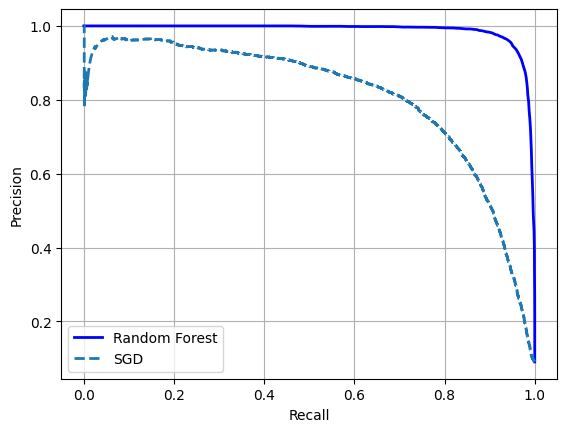

In [52]:
plt.plot(recalls_forest, precisions_forest, 'b-', linewidth=2, label="Random Forest")
plt.plot(recalls, precisions, "--", linewidth=2, label="SGD")
plt.grid()
plt.legend()
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.show()

In [53]:
y_train_pred_forest = y_probas_forest[:, 1] >= 0.5 # positive proba >= 50%
y_train_pred_forest

array([ True, False, False, ...,  True, False, False])

In [54]:
f1_score(y_train_5, y_train_pred_forest)

0.9274509803921569

In [55]:
roc_auc_score(y_train_5, y_scores_forest)

0.9983436731328145

# Multiclass Classification

In [56]:
svm_clf = SVC(random_state=42)
svm_clf.fit(X_train[:2000], y_train[:2000]) # y_train, not y_train_5

SVC(random_state=42)

In [57]:
svm_clf.predict([some_digit])

array(['5'], dtype=object)

In [58]:
some_digit_scores = svm_clf.decision_function([some_digit])
some_digit_scores.round(2)

array([[ 3.79,  0.73,  6.06,  8.3 , -0.29,  9.3 ,  1.75,  2.77,  7.21,
         4.82]])

In [59]:
class_id = some_digit_scores.argmax()
class_id

5

In [60]:
svm_clf.classes_

array(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9'], dtype=object)

In [61]:
svm_clf.classes_[class_id]

'5'

In [62]:
ovr_clf = OneVsRestClassifier(SVC(random_state=42))
ovr_clf.fit(X_train[:2000], y[:2000])

OneVsRestClassifier(estimator=SVC(random_state=42))

In [63]:
ovr_clf.predict([some_digit])

array(['5'], dtype='<U1')

In [64]:
len(ovr_clf.estimators_)

10

In [65]:
sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(X_train, y_train)

SGDClassifier(random_state=42)

In [66]:
sgd_clf.predict([some_digit])

array(['3'], dtype='<U1')

In [67]:
sgd_clf.decision_function([some_digit]).round()

array([[-31893., -34420.,  -9531.,   1824., -22320.,  -1386., -26189.,
        -16148.,  -4604., -12051.]])

In [68]:
cross_val_score(sgd_clf, X_train, y_train, cv=3, scoring="accuracy")

array([0.87365, 0.85835, 0.8689 ])

In [69]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train.astype("float64"))

In [70]:
cross_val_score(sgd_clf, X_train_scaled, y_train, cv=3, scoring="accuracy")

array([0.8983, 0.891 , 0.9018])

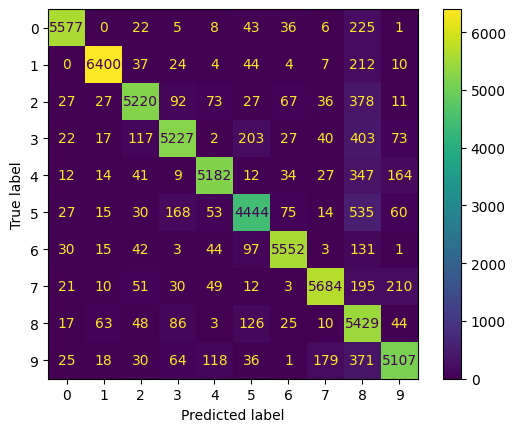

In [71]:
y_train_pred = cross_val_predict(sgd_clf, X_train_scaled, y_train, cv=3)
ConfusionMatrixDisplay.from_predictions(y_train, y_train_pred)
plt.show()

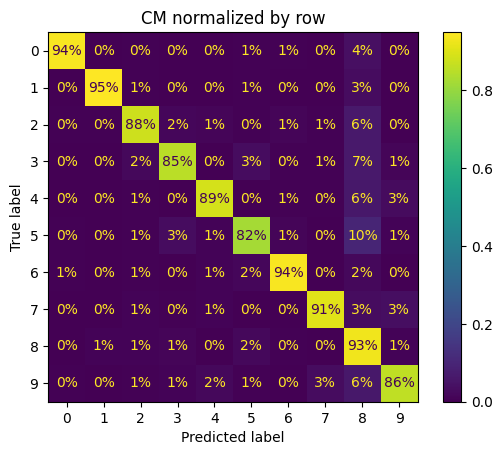

In [72]:
ConfusionMatrixDisplay.from_predictions(y_train, y_train_pred, normalize="true", values_format=".0%")
plt.title("CM normalized by row")
plt.show()

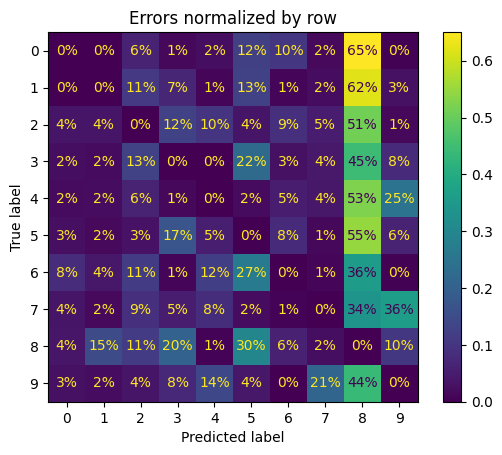

In [73]:
# Put zero weight on correct predictions
sample_weight = (y_train_pred != y_train)
ConfusionMatrixDisplay.from_predictions(y_train, y_train_pred, sample_weight=sample_weight, normalize="true", values_format=".0%")
plt.title("Errors normalized by row")
plt.show()

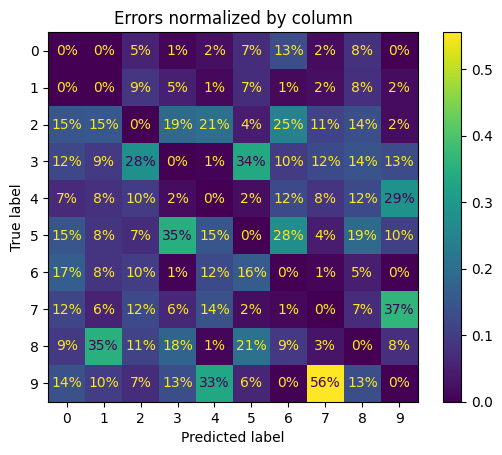

In [74]:
ConfusionMatrixDisplay.from_predictions(y_train, y_train_pred, sample_weight=sample_weight, normalize="pred", values_format=".0%")
plt.title("Errors normalized by column")
plt.show()

In [75]:
cl_a, cl_b = '3', '5'
x_aa = X_train[(y_train == cl_a) & (y_train_pred == cl_a)] # 3s predicted as 3
x_ab = X_train[(y_train == cl_a) & (y_train_pred == cl_b)] # 3s predicted as 5
x_ba = X_train[(y_train == cl_b) & (y_train_pred == cl_a)] # 5s predicted as 3
x_bb = X_train[(y_train == cl_b) & (y_train_pred == cl_b)] # 5s predicted as 5

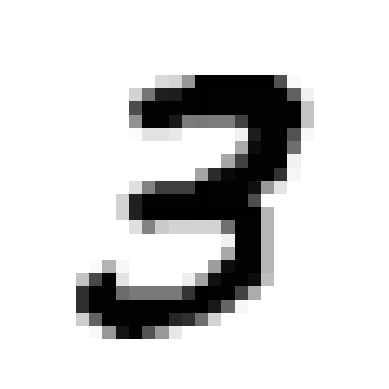

In [76]:
plot_digit(x_aa[:1, :])

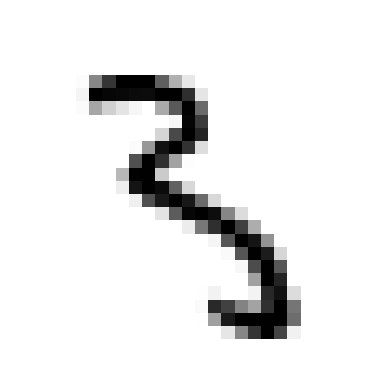

In [77]:
plot_digit(x_ab[:1, :])

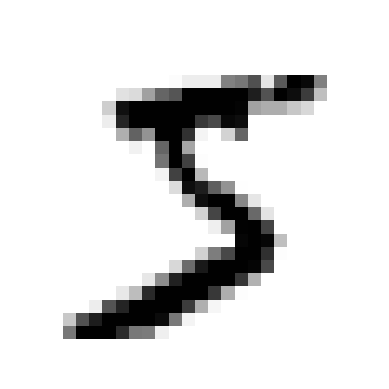

In [78]:
plot_digit(x_ba[:1, :])

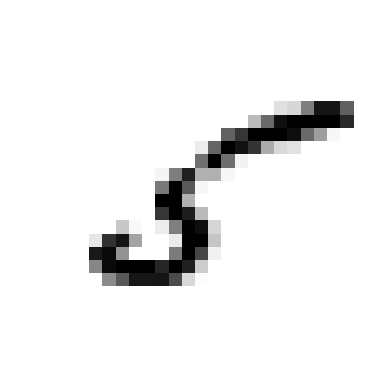

In [79]:
plot_digit(x_bb[:1, :])

# Multilabel Classification

In [80]:
y_train_large = (y_train >= '7')
y_train_odd = (y_train.astype('int8') % 2 == 1)
y_multilabel = np.c_[y_train_large, y_train_odd]

knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train, y_multilabel)

KNeighborsClassifier()

In [81]:
knn_clf.predict([some_digit])

array([[False,  True]])

In [82]:
y_train_knn_pred = cross_val_predict(knn_clf, X_train, y_multilabel, cv=3)
f1_score(y_multilabel, y_train_knn_pred, average="macro")

0.976410265560605

In [83]:
chain_clf = ClassifierChain(SVC(), cv=3, random_state=42)
chain_clf.fit(X_train[:2000], y_multilabel[:2000])

ClassifierChain(base_estimator=SVC(), cv=3, random_state=42)

In [84]:
chain_clf.predict([some_digit])

array([[0., 1.]])

# Multioutput Classification

In [85]:
np.random.seed(42)
noise = np.random.randint(0, 100, (len(X_train), 784))
X_train_mod = X_train + noise
noise = np.random.randint(0, 100, (len(X_test), 784))
X_test_mod = X_test + noise
y_train_mod = X_train
y_test_mod = X_test

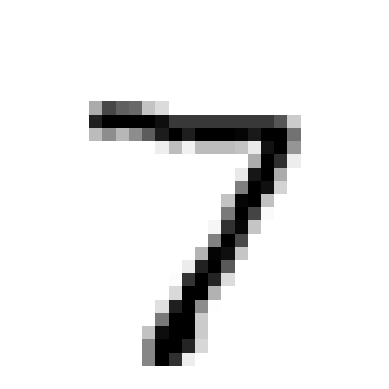

In [86]:
plot_digit(X_test[0])

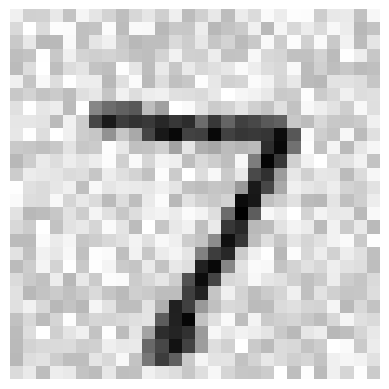

In [87]:
plot_digit(X_test_mod[0])

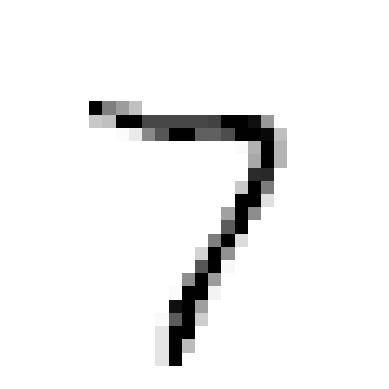

In [88]:
knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train_mod, y_train_mod)
clean_digit = knn_clf.predict([X_test_mod[0]])
plot_digit(clean_digit)
plt.show()